In [1]:
import torch
import skimage
import matplotlib.pyplot as plt
import os
from torchvision import models

In [2]:
import pandas as pd
from tqdm import tqdm

In [3]:
from core.CNN_scorers import TorchScorer
from core.insilico_exps import resize_and_pad_tsr

In [4]:
class ImageLoader(object):
    def __init__(self, datapath) -> None:
        self.datapath = datapath
        self._flies_df = pd.DataFrame(columns=['File', 'Shape'])
        self._num_imgs = 0
        self.imgs = torch.Tensor([])
    
    @staticmethod
    def preprocess(img):
        img_tensor = torch.Tensor(img).permute((2, 0, 1)).unsqueeze(dim=0)
        img_new = resize_and_pad_tsr(img_tensor, (224, 224), (0, 0))
        return img_new

    def load(self):
        list_of_files = []
        for root, dirs, files in os.walk(self.datapath):
            for file in files:
                list_of_files.append(os.path.join(root, file))
        for name in tqdm(list_of_files):
            img = skimage.io.imread(name)
            shape_tmp = img.shape
            dic_tmp = {
                'File': [name],
                'Shape': [str(shape_tmp)]
            }
            df_tmp = pd.DataFrame(data=dic_tmp)
            self._flies_df = pd.concat([self._flies_df, df_tmp], axis=0)

            img_processed = self.preprocess(img.copy())
            self.imgs = torch.concat([self.imgs, img_processed])
        self._num_imgs = self.imgs.shape[0]
        return self._num_imgs

    def get_imgs(self):
        return self.imgs

In [5]:
datapath = '../../Datasets/imagenette2/train/n01440764'

In [6]:
imloader = ImageLoader(datapath)

In [7]:
imloader.load()

100%|██████████| 963/963 [01:00<00:00, 15.84it/s]


963

In [8]:
imgs = imloader.get_imgs()

In [9]:
imgs.shape

torch.Size([963, 3, 224, 224])

In [10]:
model = TorchScorer(model_name='vit_b_16')

In [11]:
model_unit = ("vit_b_16", ".heads.Linearhead", 0)
model.select_unit(model_unit)

In [26]:
scores = model.score_tsr(imgs / 255.)

(array([  2.,   0.,   0.,   3.,   2.,   7.,   8.,  30., 704., 207.]),
 array([ 0.41302833,  1.38608898,  2.35914962,  3.33221027,  4.30527092,
         5.27833156,  6.25139221,  7.22445286,  8.1975135 ,  9.17057415,
        10.1436348 ]),
 <BarContainer object of 10 artists>)

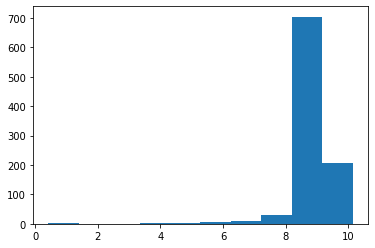

In [27]:
plt.hist(scores)

In [28]:
img_generated = plt.imread('../ActMax-Optimizer-Dev/tmp/Best_vit_b_16_exp.png')

In [29]:
img_generated = img_generated[:, :, :3]
img_generated.shape

(224, 224, 3)

In [30]:
img_generated = torch.Tensor(img_generated).permute((2, 0, 1)).unsqueeze(dim=0)
img_generated.shape

torch.Size([1, 3, 224, 224])

In [31]:
model_unit = ("vit_b_16", ".heads.Linearhead", 0)
model.select_unit(model_unit)

In [33]:
model.score_tsr(img_generated)

array([11.30440044])